In [52]:
import torch
import pandas as pd
import random
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
torch.tensor(1)

tensor(1)

In [3]:
torch.randn(1)#.view([]).shape

tensor([0.2906])

Epoch 1: Error Count = 4.0
Epoch 2: Error Count = 1.0
Epoch 3: Error Count = 2.0
Epoch 4: Error Count = 1.0
Epoch 5: Error Count = 0.0
Training Accuracy: 100.00%


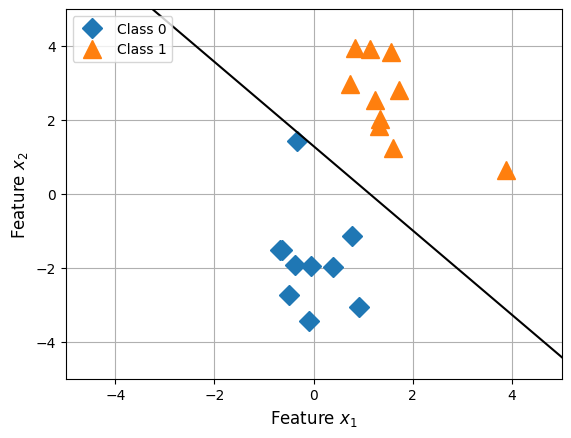

In [51]:
# Exercise 3: Use a learning rate for updating the weights and bias unit
# Modify the Perceptron class using a so-called learning rate for updating the weights and bias unit. The learning rate is a setting for adjusting the magnitude of the weight and bias unit updates. Changing the learning rate can accelerate or slow down the learning speed of the perceptron (in terms of the number of iterations required for finding a good decision boundary).
#

data = {
    'x1': [0.77, -0.33, 0.91, -0.37, -0.63, 0.39, -0.49, -0.68, -0.10, -0.05,
           3.88, 0.73, 0.83, 1.59, 1.14, 1.73, 1.31, 1.56, 1.23, 1.33],
    'x2': [-1.14, 1.44, -3.07, -1.91, -1.53, -1.99, -2.74, -1.52, -3.43, -1.95,
           0.65, 2.97, 3.94, 1.25, 3.91, 2.80, 1.85, 3.85, 2.54, 2.03],
    'label': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
# print(df)
TRAINING_DYPE = torch.float64

X_train = df[['x1', 'x2']].values
y_train = df['label'].values

X_train = torch.from_numpy(X_train).to(TRAINING_DYPE)
y_train = torch.from_numpy(y_train).to(TRAINING_DYPE)


class OLDPerceptron:
    def __init__(self, num_features, learning_rate=1):
        random.seed(123)
        self.learning_rate = learning_rate
        self.num_features = num_features
        self.weights = [random.uniform(-0.5, 0.5) for _ in range(num_features)]
        # self.weights = [0.0 for _ in range(num_features)]
        # self.weights = np.zeros(num_features)
        self.bias = random.uniform(-0.5, 0.5)
        # self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += self.weights[i] * x[i]
        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0
        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        #update
        self.bias += error * self.learning_rate
        for i, _ in enumerate(self.weights):
            self.weights[i] += (x[i] * error) * self.learning_rate

        return error

class Perceptron:
    def __init__(self, num_features, learning_rate=1):
        random.seed(123)
        self.learning_rate = torch.tensor(learning_rate)
        self.num_features = num_features

        self.weights = torch.randn(num_features, dtype=TRAINING_DYPE)
        # self.weights = torch.randn(num_features, dtype=torch.float32)
        self.bias = torch.randn(1).view([])
        # self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = torch.dot(x, self.weights) + self.bias

        if weighted_sum_z > 0.0:
            prediction = torch.tensor(1.)
        else:
            prediction = torch.tensor(0.)
        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        #update
        self.bias += error * self.learning_rate 
        self.weights += (x * error) * self.learning_rate

        return error


def trainmodel(model, all_x, all_y, epochs=10):
    for epoch in range(epochs):
        error_count = 0
        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        # break epoch run if error is 0
        print(f"Epoch {epoch+1}: Error Count = {error_count}")
        # if error_count == 0:
        #     break

def evaluate(model: Perceptron, all_x, all_y):

    correct = 0
    for x,y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)


def plot_decision_boundary(model:Perceptron):

    w1, w2 = model.weights
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) - b) / w2

    x1_max = 20
    x2_max = (-(w1 * x1_max) - b) / w2

    return x1_min, x2_min, x1_max, x2_max


ppn = E1Perceptron(num_features=2, learning_rate=0.5)
trainmodel(ppn, X_train, y_train, epochs=5)
#
train_accuracy = evaluate(ppn,X_train, y_train)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

x1_min, x2_min, x1_max, x2_max = plot_decision_boundary(ppn)

plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()



In [23]:
X_train = df[['x1', 'x2']]#.values
y_train = df['label']#.values

In [5]:
# Torch
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

In [7]:
# X_train
X_train.shape


torch.Size([20, 2])

In [4]:
import random
import numpy as np

# w = [np.random.uniform(-5,5) for _ in range(len(X_train))]
tt = [[random.random() for _ in range(20)] for i in range(20)]
w = [np.random.uniform(-5,5) for _ in range(len(tt))]
tt[1][4] ='a'

def my_func(X, w, b):
    outputs = []
    for x in X:
        output = b
        for x_j, w_j in zip(x,w):
            try:
                output = b + (x_j * w_j)
            except:
                prin 
            outputs.append(output)
    return output



my_func(tt, w, 0.)

-0.28085842457824156

In [ ]:
print(tt[0])



In [33]:
[[random.random() for _ in range(20)] for i in range(20)]

[[0.032107245880648505,
  0.07968916503071977,
  0.18407520090273932,
  0.42055692210912987,
  0.13716142497396644,
  0.9807306535620373,
  0.6913209879842934,
  0.756329695793696,
  0.5516387905571944,
  0.6810107122694906,
  0.6182418324072334,
  0.3773690245656366,
  0.6509752005104227,
  0.9054528931168812,
  0.8930452636931715,
  0.35097553343637455,
  0.6341534411592182,
  0.9910439055505157,
  0.6958297278358433,
  0.7986703459075724],
 [0.21588077568927055,
  0.6821560498083571,
  0.3126606408536675,
  0.2616866971421383,
  0.14144878232188196,
  0.7280956062049155,
  0.868323599318864,
  0.9993385245069681,
  0.22566564131128064,
  0.23613306661221978,
  0.17196513812415615,
  0.17063742603095677,
  0.15601437081061575,
  0.08575438507696653,
  0.13922664288844389,
  0.6645415120298684,
  0.7370531510872022,
  0.6751110842747454,
  0.8310750959268385,
  0.5340983394947019],
 [0.5125542716116878,
  0.2590258757615044,
  0.37312104338710883,
  0.947747119708458,
  0.086154536063

In [48]:
# exercise
# Exercise 1
# The goal of this exercise is to simplify the code implementation below. For this, we are going to use the torch.where function for the forward method.
#
# Your task is to learn about torch.where using the PyTorch documentation. Finding torch.where in the API documentation is part of this exercise :).
#
# Then, using torch.where make the appropriate changes in the forward method below. Besides the forward method, nothing else needs to be changed in this notebook. Also, the predictions should be exactly like before.

class E1Perceptron:
    def __init__(self, num_features, learning_rate=1):
        random.seed(123)
        self.learning_rate = torch.tensor(learning_rate)
        self.num_features = num_features

        self.weights = torch.randn(num_features, dtype=TRAINING_DYPE)
        # self.weights = torch.randn(num_features, dtype=torch.float32)
        self.bias = torch.randn(1).view([])
        # self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = torch.dot(x, self.weights) + self.bias

        prediction = torch.where(weighted_sum_z>0, torch.tensor(1.), torch.tensor(0.))
        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        #update
        self.bias += error * self.learning_rate
        self.weights += (x * error) * self.learning_rate

        return error
